In [4]:
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(100)

# 1. Model

In LR class, we explicitly compute the gradients w.r.t w and b.

In [5]:
class LR:
    def __init__(self, lr):
        self.W = np.random.normal(0, 0.1, 2)
        self.b = np.random.normal(0, 0.1, 1)
        self.learning_rate = lr
    
    def forward(self, X, y):
        z = X.dot(self.W) + self.b
        a = 1 / (1 + np.exp(-z))
        loss = np.mean(-(y*np.log(a) + (1-y)*np.log(1-a)))
        return loss
    
    def backward(self, X, y):
        N, D = X.shape
        
        z = X.dot(self.W) + self.b
        a = 1 / (1 + np.exp(-z))
        dw = (a - y).dot(X) / N
        db = np.mean(a - y)
        self.W = self.W - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

# 2. Experiemnts

In [6]:
def toy_examples(N):    
    mean_1 = [3, 3]
    cov_1 = [[1, 0], [0, 1]]
    X_1 = np.random.multivariate_normal(mean_1, cov_1, N)
    y_1 = [1] * N
    
    mean_2 = [5, 0]
    cov_2 = [[1, 0], [0, 1]]
    X_2 = np.random.multivariate_normal(mean_2, cov_2, N)
    y_2 = [0] * N
    
    X = np.r_[X_1, X_2]
    y = np.r_[y_1, y_2]
    
    permutated_idx = np.random.permutation(2 * N)
    X = X[permutated_idx]
    y = y[permutated_idx]
    
    return X, y

N = 1082
X, y = toy_examples(N)

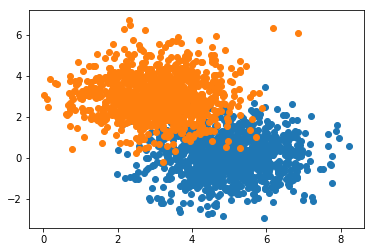

In [7]:
plt.figure()
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'o')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'o')
plt.show()

In [8]:
def batch_generator(batch_size, X, y, shuffle=True):
    N, _ = X.shape
    
    if shuffle:
        indices = np.random.permutation(N)
        X = X[indices]
        y = y[indices]
    
    n_batches = int(N / batch_size) + 1
    
    for i in range(n_batches):
        if i == n_batches - 1:
            yield X[i * batch_size: ], y[i * batch_size: ]
        else:
            yield X[i * batch_size: (i+1) * batch_size], y[i * batch_size: (i+1) * batch_size]
    

# The process of gradient descent.

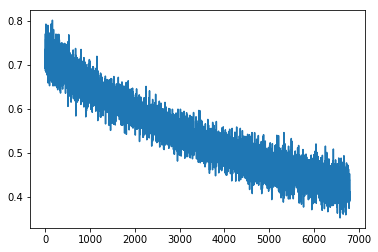

In [9]:
epochs = 100
lr = 0.0001
batch_size = 32

lr = LR(lr)
losses = []
for _ in range(epochs):
    for batch_X, batch_y in batch_generator(batch_size, X, y, True):
        
        loss = lr.forward(batch_X, batch_y)
        losses.append(loss)

        lr.backward(batch_X, batch_y)
    
plt.plot(range(len(losses)), losses)
plt.show()

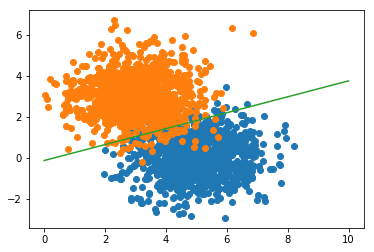

[-0.15135562  0.38770019] [-0.13333718]


In [10]:
plt.figure()
plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], 'o')
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], 'o')

line_x = [0, 10]
line_y = lr.W * line_x + lr.b
plt.plot(line_x, line_y)
plt.show()

print(lr.W, lr.b)